# Load

In [1]:
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import warnings
#import missingno as msno
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\Users\asuss\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\asuss\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

In [2]:
pd.__version__

'1.3.2'

In [3]:
np.__version__

'1.21.1'

In [4]:
%matplotlib inline

In [5]:
train = pd.read_csv('bikesharing/train.csv')
test = pd.read_csv('bikesharing/test.csv')
submit = pd.read_csv('bikesharing/sampleSubmission.csv')

# Summary

In [6]:
print("train shape:", train.shape)
print("test shape:", test.shape)
print("submit shape:", submit.shape)

train shape: (10886, 12)
test shape: (6493, 9)
submit shape: (6493, 2)


In [7]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [8]:
test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [9]:
submit.head(3)

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [12]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [13]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


# Missing Values

In [14]:
#msno.matrix(train, figsize=(12,5))

# Feature Engineering

In [15]:
train['date'] = train.datetime.apply(lambda x : x.split(' ')[0]) #split要有空格
train['year'] = train.datetime.apply(lambda x : x.split(' ')[0].split('-')[0])
train['month'] = train.date.apply(lambda datestring : calendar.month_name[datetime.strptime(datestring, '%Y-%m-%d').month])
train['hour'] = train.datetime.apply(lambda x : x.split(' ')[1].split(':')[0])
train['weekday'] = train.date.apply(lambda datestring : calendar.day_name[datetime.strptime(datestring,'%Y-%m-%d').weekday()])
train['season'] = train.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
#train['weather'] = train.weather.map({1:'Clear + Few clouds + Partly cloudy + Partly cloudy',\
#                                     2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',\
#                                     3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',\
#                                     4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Weather'),
 Text(0.5, 1.0, 'Box Plot on Count Across Weather')]

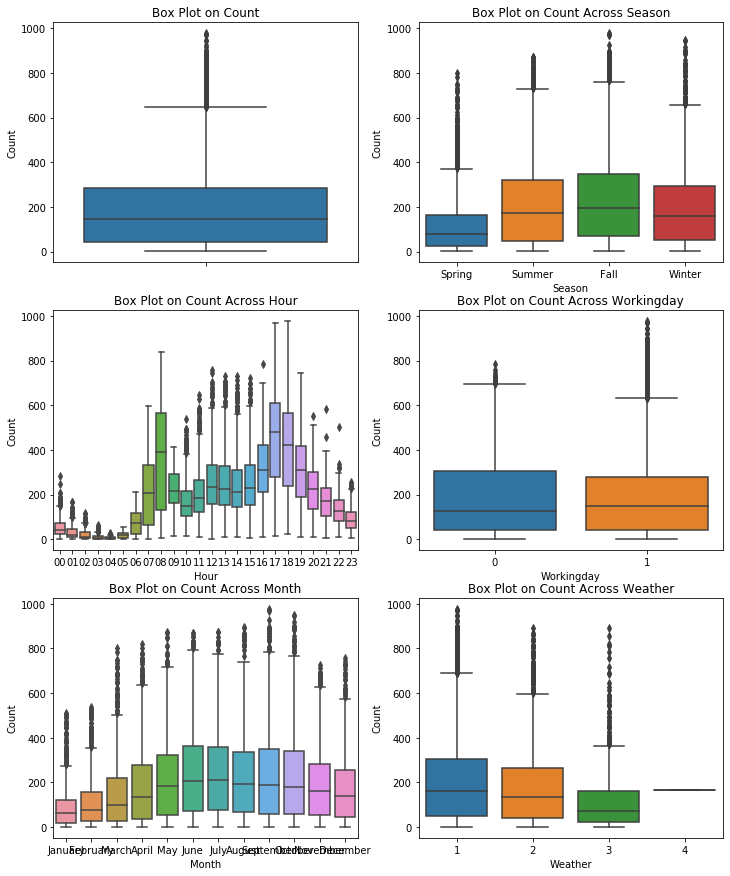

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(12,15)
sns.boxplot(data=train, y='count', orient='v', ax=axes[0][0])
sns.boxplot(data=train, x='season', y='count', orient='v', ax=axes[0][1])
sns.boxplot(data=train, x='hour', y='count', orient='v', ax=axes[1][0])
sns.boxplot(data=train, x='workingday', y='count', orient='v', ax=axes[1][1])
sns.boxplot(data=train, x='month', y='count', orient='v', ax=axes[2][0])
sns.boxplot(data=train, x='weather', y='count', orient='v', ax=axes[2][1])

axes[0][0].set(ylabel='Count', title='Box Plot on Count')
axes[0][1].set(xlabel='Season', ylabel='Count', title='Box Plot on Count Across Season')
axes[1][0].set(xlabel='Hour', ylabel='Count', title='Box Plot on Count Across Hour')
axes[1][1].set(xlabel='Workingday', ylabel='Count', title='Box Plot on Count Across Workingday')
axes[2][0].set(xlabel='Month', ylabel='Count', title='Box Plot on Count Across Month')
axes[2][1].set(xlabel='Weather', ylabel='Count', title='Box Plot on Count Across Weather')

#spring got relatively low count
#7-8/17-18hour rush time,it can be attributed to office users and students
#most outlier from workingday
#sunny, no rain, relatively high count

# Outliers Analysis

In [17]:
print("Shape of the before outlier:", train.shape)
train = train[np.abs(train['count']-train['count'].mean()) <= (3*train['count'].std())]
print("Shape of the after outlier:", train.shape)

Shape of the before outlier: (10886, 17)
Shape of the after outlier: (10739, 17)


# Correlation Analysis

Text(0.5, 1, 'Triangle Corr Heatmap')

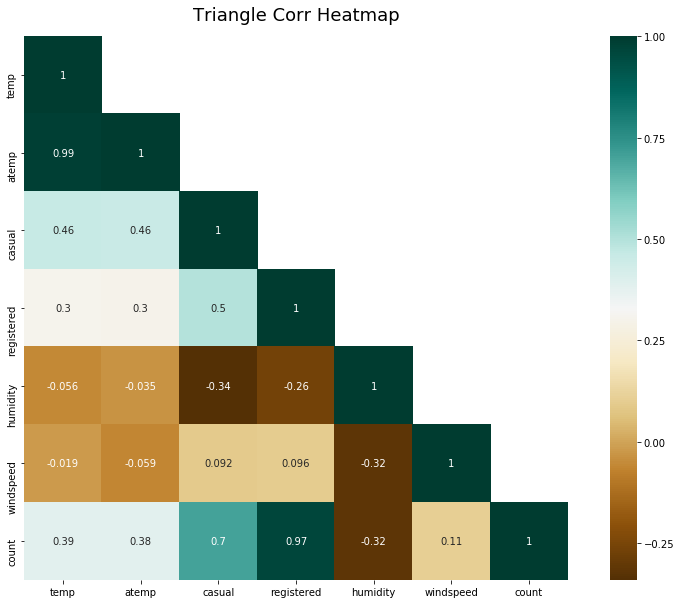

In [18]:
corrMatt = train[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']].corr()
mask = np.triu(np.ones_like(corrMatt, dtype=np.bool), 1)

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
corrHeatmap = sns.heatmap(corrMatt, mask=mask, vmax=1, square=True, annot=True, cmap='BrBG')
corrHeatmap.set_title('Triangle Corr Heatmap', fontdict={'fontsize':18}, pad=16)

Text(0.5, 1, 'Features Corr with Count')

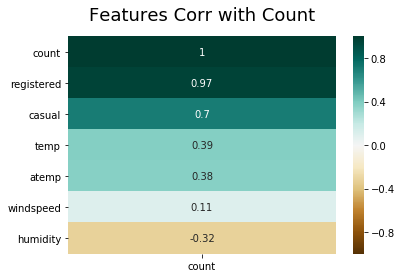

In [19]:
sortHeatmap = sns.heatmap(corrMatt[['count']].sort_values(by='count', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
sortHeatmap.set_title('Features Corr with Count', fontdict={'fontsize':18}, pad=16)

# Visualizing

      hour    variable  value
0       00      casual      3
1       01      casual      8
2       02      casual      5
3       03      casual      3
4       04      casual      0
...    ...         ...    ...
21473   19  registered    329
21474   20  registered    231
21475   21  registered    164
21476   22  registered    117
21477   23  registered     84

[21478 rows x 3 columns]
   hour    variable       value
0    00      casual   10.312088
1    00  registered   44.826374
2    01      casual    6.513216
3    01  registered   27.345815
4    02      casual    4.819196
5    02  registered   18.080357
6    03      casual    2.681293
7    03  registered    9.076212
8    04      casual    1.262443
9    04  registered    5.144796
10   05      casual    1.455752
11   05  registered   18.311947
12   06      casual    4.149451
13   06  registered   72.109890
14   07      casual   10.914286
15   07  registered  202.202198
16   08      casual   20.912644
17   08  registered  322.806897
18   0

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Hour'),
 Text(0.5, 1.0, 'Average count by hour across user type')]

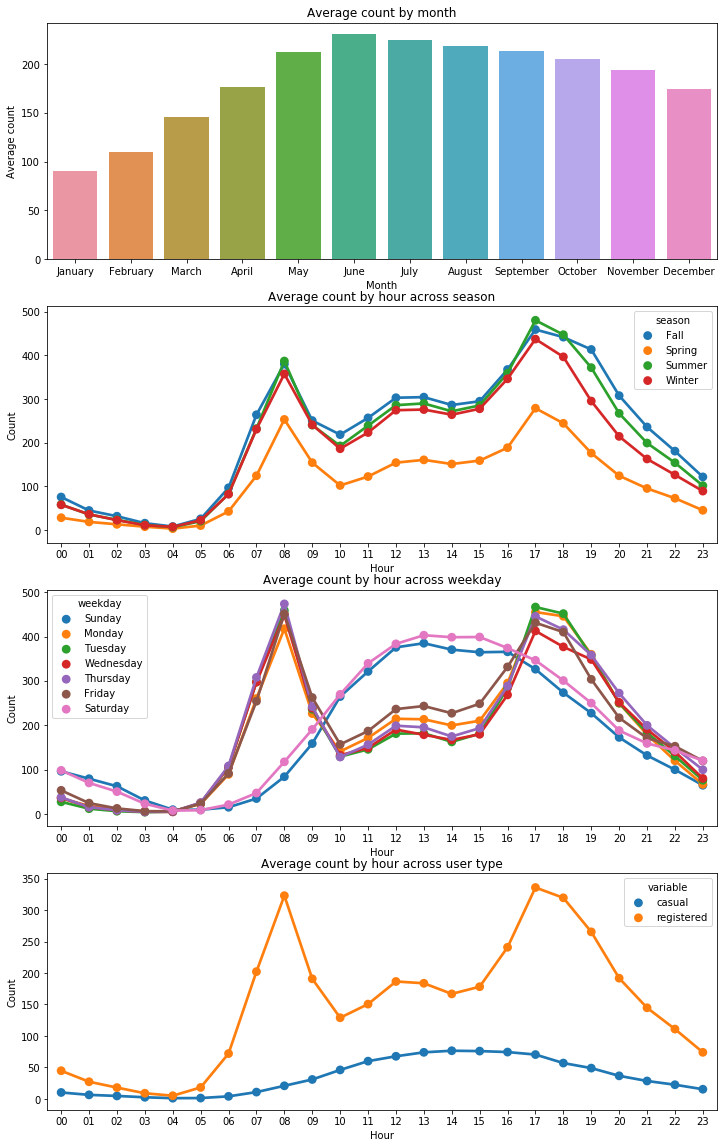

In [44]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4)
fig.set_size_inches(12,20)

monthOrder = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
weekOrder = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

monthAgg = pd.DataFrame(train.groupby('month')['count'].mean()).reset_index()
monthSort = monthAgg.sort_values(by='count', ascending=False)
sns.barplot(data=monthSort, x='month', y='count', ax=ax1, order=monthOrder)
ax1.set(xlabel='Month', ylabel='Average count', title='Average count by month')


hourAgg = pd.DataFrame(train.groupby(['hour', 'season'])['count'].mean()).reset_index()
sns.pointplot(data=hourAgg, x=hourAgg['hour'], y=hourAgg['count'], hue=hourAgg['season'], join=True, ax=ax2)#join=True將點連成折線圖
ax2.set(xlabel='Hour', ylabel='Count', title='Average count by hour across season')

weekdayAgg = pd.DataFrame(train.groupby(['hour', 'weekday'])['count'].mean()).reset_index()
sns.pointplot(data=weekdayAgg, x=weekdayAgg['hour'], y=weekdayAgg['count'], hue=weekdayAgg['weekday'], hue_order=weekOrder, join=True, ax=ax3)
ax3.set(xlabel='Hour', ylabel='Count', title='Average count by hour across weekday')

transform = pd.melt(train[['hour', 'casual', 'registered']], id_vars=['hour'], value_vars=['casual', 'registered'])
print(transform)
regisAgg = pd.DataFrame(transform.groupby(['hour', 'variable'])['value'].mean()).reset_index()
print(regisAgg)
sns.pointplot(data=regisAgg, x=regisAgg['hour'], y=regisAgg['value'], hue=regisAgg['variable'], hue_order=['casual', 'registered'], join=True, ax=ax4)
ax4.set(xlabel='Hour', ylabel='Count', title='Average count by hour across user type')

# Combine train and test

In [21]:
datatrain = pd.read_csv('bikesharing/train.csv')
datatest = pd.read_csv('bikesharing/test.csv')

In [22]:
data = datatrain.append(datatest)
data.reset_index(inplace=True)
data.drop('index', inplace=True, axis=1)

In [23]:
data.head(3) #datetime需處理

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0


In [24]:
data.shape #train去outlier+test

(17379, 12)

In [25]:
#feature engineering
data['date'] = data.datetime.apply(lambda x : x.split(' ')[0]) #split要有空格
data['year'] = data.datetime.apply(lambda x : x.split(' ')[0].split('-')[0]).astype('int') #原本為索引字串轉換成整數
data['month'] = data.date.apply(lambda datestring : datetime.strptime(datestring, '%Y-%m-%d').month)
data['hour'] = data.datetime.apply(lambda x : x.split(' ')[1].split(':')[0]).astype('int')
data['weekday'] = data.date.apply(lambda datestring : datetime.strptime(datestring,'%Y-%m-%d').weekday())

In [26]:
data.head(5) #觀察連續資料:Atemp humidity temp windspeed

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011-01-01,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011-01-01,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011-01-01,2011,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011-01-01,2011,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011-01-01,2011,1,4,5


In [27]:
data.shape

(17379, 17)

# Random forest model to predict windspeed

[Text(0.5, 0, 'windspeed'), Text(0.5, 1.0, 'distribution of windspeed')]

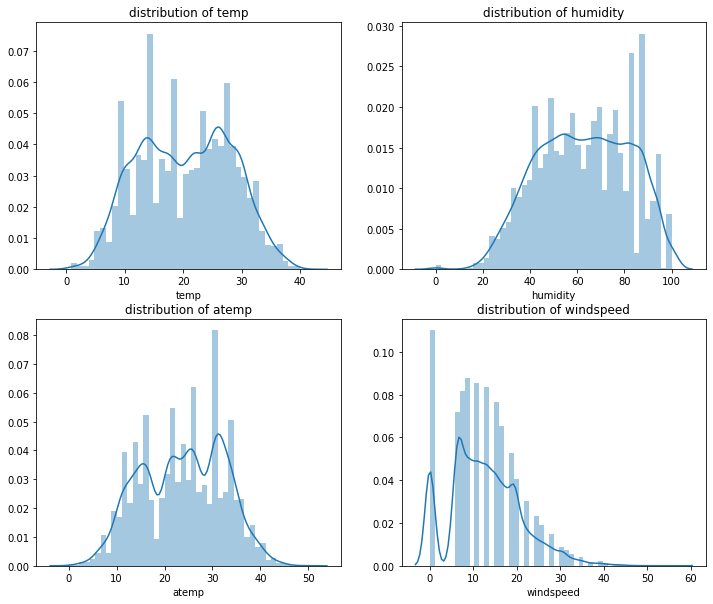

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)
sns.distplot(data['temp'], ax=axes[0][0])
sns.distplot(data['atemp'], ax=axes[1][0])
sns.distplot(data['humidity'], ax=axes[0][1])
sns.distplot(data['windspeed'], ax=axes[1][1])

axes[0][0].set(xlabel='temp', title='distribution of temp')
axes[1][0].set(xlabel='atemp', title='distribution of atemp')
axes[0][1].set(xlabel='humidity', title='distribution of humidity')
axes[1][1].set(xlabel='windspeed', title='distribution of windspeed')
#風速空值都補植為0 Model會失準 須重新估計風速為0的值

In [29]:
#將資料分成風速0 風速不為0
datawind0 = data[data['windspeed']==0]
datawindnot0 = data[data['windspeed'] !=0]
rfmodel_wind = RandomForestRegressor(n_estimators=1000, random_state=42)
#用來預測風速Y的欄位X有哪些:atemp humidity season temp weather year month
windcols = ['atemp', 'humidity', 'season', 'temp', 'weather', 'year', 'month']
#用風速不為0的欄位X來TRAIN MODEL
rfmodel_wind.fit(datawindnot0[windcols], datawindnot0['windspeed'])
#用風速為0的欄位X 預測
wind0values = rfmodel_wind.predict(X= datawind0[windcols])
datawind0.loc[:, 'windspeed']=wind0values #values是值 要用loc指定位置才可放入
#合併風速0 風速不為0
data = datawind0.append(datawindnot0)
data.reset_index(inplace=True, drop=True)

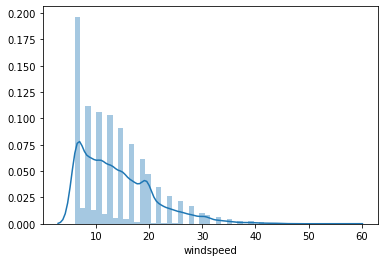

In [30]:
sns.distplot(data['windspeed']) #空隙都被填滿了

# Coercing to categorical type

In [31]:
categoricalFeatureNames = ['season', 'holiday', 'workingday', 'weather', 'weekday', 'month', 'year', 'hour']
numericalFeatureNames = ['temp', 'atemp', 'humidity', 'windspeed']
dropFeatures = ['date', 'datetime', 'casual', 'registered', 'count']

In [32]:
for var in categoricalFeatureNames:
    data[var] = data[var].astype('category')

# Splitting train and test

In [33]:
dataTrain = data[pd.notnull(data['count'])].sort_values(by=['datetime'])
dataTest = data[-pd.notnull(data['count'])].sort_values(by=['datetime'])
#drop cols:datetime date casual registered count #保留submit要用的datetimecol trainmodel要用的count
datetimecols = dataTest['datetime']
ylabels = dataTrain['count']
ylabelsRegistered = dataTrain['registered']
ylabelsCasual = dataTrain['casual']

In [34]:
dataTrain = dataTrain.drop(dropFeatures, axis=1)
dataTest = dataTest.drop(dropFeatures, axis=1)

# RMSLE Scorer

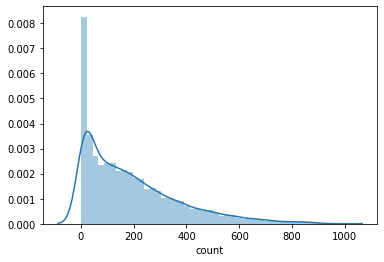

In [35]:
sns.distplot(ylabels)#不符常態分配

In [36]:
ylabelsLog = np.log1p(ylabels) #將train的Y值取lOG

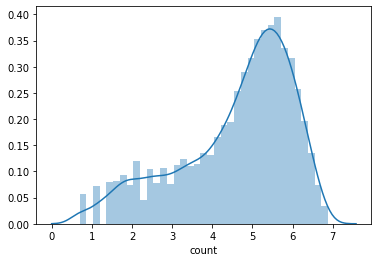

In [37]:
sns.distplot(ylabelsLog) 

In [38]:
def rmsle(y, y_, convertExp=True):
    if convertExp:
        y = np.exp(y)
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v+1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v+1) for v in y_]))
    calc = (log1-log2)**2
    return np.sqrt(np.mean(calc))

# Random forest

In [39]:
rfModel = RandomForestRegressor(n_estimators=1000, random_state=42, oob_score=True)
rfModel.fit(dataTrain, ylabelsLog)
pred = rfModel.predict(X=dataTest)
np.exp(pred)
print('%.4f'%rfModel.oob_score_)

0.9572


In [40]:
#RMSLE Value for train data 
trainpred = rfModel.predict(X=dataTrain)
print('RMSLE value:', rmsle(np.exp(ylabelsLog), np.exp(trainpred), False))

RMSLE value: 0.10065643802817688


In [41]:
submission = pd.DataFrame({
    'datetime' : datetimecols,
    'count' : np.exp(pred)
})
submission
submission.to_csv('bikesharing_pred_rf.csv', index=False)